### Part I. Use the Fama-French “48 Industry Portfolios,” which are available on Ken French’s data library. Use the set of monthly returns for value weighted portfolios in the past 20 years, that is since January 2002. 

Pick your favorite ten industries and plot the efficient frontier using those industries as the universe of risky assets and do a mMlti-Asset Efficient Frontier Analysis

In [2]:
# Import libraries for data manipulation
# these two lines of code usually help to get the code running again. its called a magic function.
# use this when your code downloads external packages
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Import the data
ret = pd.read_csv("Average Value Weighted Returns -- Monthly.csv", 
                  header=0, index_col=0)/100

# Convert index from Year-month period (this is how the data is imported) to monthly returns 
# Q: What if we don't do this? isn't the data in yearly period already? 
ret.index = pd.to_datetime(ret.index, format="%Y%m").to_period("M")
# file has header in row 1 

# remove spaces in column name (we know this because it is the same data)
ret.columns = ret.columns.str.strip()


In [19]:
# Inspect the head and tail of the data, "mydata.head() or mydata.tail()"
# pd.read_csv("path or dataname", header=0, index_col=0)

ret.tail()
ret.head()


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07,0.0237,0.0012,-0.9999,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0192,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0577,0.0520
1926-08,0.0223,0.0268,-0.9999,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,0.0032,0.0676
1926-09,-0.0057,0.0158,-0.9999,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0008,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0481,-0.0386
1926-10,-0.0046,-0.0368,-0.9999,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0262,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,-0.0094,-0.0849
1926-11,0.0675,0.0626,-0.9999,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0161,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0513,0.0400


In [14]:
# We want to build assets for a whole potfolio,find the efficient frontier, using
# we need vector of expected returmns, covariance matrix 
# this calculates the number of rows only
ret["1992":].shape[0]


384

# Calculate the expected annual return and volatility of the portfolio  

In [15]:
# mydata["1992":].shape[0]

In [24]:
ret["1992":].shape
ret["1992":].shape[1]

48

## Calulate and visualize returns 

<Axes: >

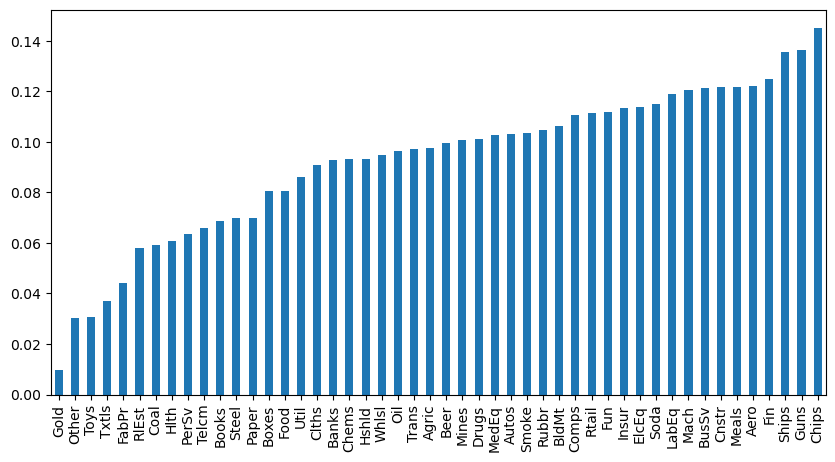

In [39]:
# Calulate the number of years from 1992. The data starts from 1926, we filter the most recent 20 years of returns
n_years=ret["1992":].shape[0]/12 

# Cal the E(R) using the formula  " (1+R)^1/n_years -1 "
eret=((1+ret["1992":]).prod())**(1/n_years)-1

# Look at the top returns for the first 5 industries 
eret.head()

# Sort and plot returns
 # eret.sort_values() ~ this sorts the returns 
eret.sort_values().plot.bar(figsize=(10,5))

## Calculate the volatility of the portfolio

In [45]:
# The diagonal of the covariance matrix is the SD or the average volatility of each industry
cov=ret["1992":].cov()*12
# cov

# cov.shape - dim of the covariance matrix 

## Part II.	Multi-Asset Efficient Frontier Analysis: (15%) Pick your favorite ten industries and plot the efficient frontier using those industries as the universe of risky assets. 


In [48]:
l= ["Agric", "Food", "Soda", "Beer", "Smoke", "Toys", "Fun", "Books", "Hshld", "Clths"]

# Calculate the E(R)
eret[l]

Agric    0.097653
Food     0.080716
Soda     0.115073
Beer     0.099680
Smoke    0.103592
Toys     0.030835
Fun      0.111984
Books    0.068876
Hshld    0.093361
Clths    0.090767
dtype: float64

In [51]:
# Calculate the covariance matrix where the leading doagonal is the SD of the industry. 
cov.loc[l,l]

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths
Agric,0.046055,0.009700,0.009953,0.008375,0.010668,0.017564,0.022171,0.019004,0.008521,0.016928
Food,0.009700,0.018775,0.014645,0.013834,0.016591,0.013491,0.013809,0.013156,0.012084,0.014434
Soda,0.009953,0.014645,0.053101,0.020730,0.015570,0.019399,0.024218,0.019795,0.017288,0.021368
Beer,0.008375,0.013834,0.020730,0.025130,0.013791,0.012605,0.013570,0.011413,0.015548,0.013191
Smoke,0.010668,0.016591,0.015570,0.013791,0.052970,0.015245,0.013988,0.012561,0.013106,0.013067
Toys,0.017564,0.013491,0.019399,0.012605,0.015245,0.057136,0.038807,0.027877,0.016100,0.033053
Fun,0.022171,0.013809,0.024218,0.013570,0.013988,0.038807,0.073651,0.037793,0.017378,0.039036
Books,0.019004,0.013156,0.019795,0.011413,0.012561,0.027877,0.037793,0.041734,0.014832,0.029643
Hshld,0.008521,0.012084,0.017288,0.015548,0.013106,0.016100,0.017378,0.014832,0.020957,0.016138
Clths,0.016928,0.014434,0.021368,0.013191,0.013067,0.033053,0.039036,0.029643,0.016138,0.047917


In [52]:
# Define portfolio returns
def portfolio_ret(weights, returns):
    """
    weights + asset returns --> portfolio return 
    """
    return weights.T @ returns

In [54]:
# Define portfolio variance 
def portfolio_vol(weights, covmat): 
    """
    weights + covariance matrix --> portfolio volatility 
    """
    return (weights.T @ covmat @ weights)**0.5 

# Multi-Asset Efficient Frontier

In order to plot the frontier for portfolios with more than 2 assets, we need to find the weights of the portfolios on the efficient frontier. To find the optimal weights, we need a function that will **minimize the volatility for a given level of return**.

In [84]:
from scipy.optimize import minimize

In [116]:
# variance-covariance matrix (covmat), 
def minimize_vol(target_return, ereturns, covmat): #ereturns represents the dotted lines
    """
    target return --> weights in a minimum-variance portfolio that generates the target return
    
    """
    n = ereturns.shape[0] # this is the number of assets in our universe. we use E(R) because this is what we have for each asset plotted on our efficient frontier
    
                
                # here, we tryna get the minimum weight. We make an initial guess, we give it a range and then it 
                # iterates and then finds the try different values. This will be out init_value || init_guess
                # we create an array of size 1/n,n. We need a range (bounds) from 0-1 representing the weights
                # the shape of our initial guess should be the same as the number of assets in our portfolio. 
                # The initial guess will be 1/n, n=number of assets in our portfolio. if n=10, init_guess = 1/10
                # using numpy, create an array of size 10 with 10 initial weights (1/10, 1/10, ... 1/10) 10 times
                # the range of the weights MUST lie between [0,1]
    
    init_values = np.repeat(1/n,n)
    bounds = ((0,1),)*n # create an array from 0 - 1 . The weights must be between [0,1]
                
    # constraints ( these are from slide 3) of our 
    weights_sum_to_1 = {'type': 'eq', # Weight transpose x Returns = Ro. the type is equality 'eq' we use
                        'fun': lambda weights: np.sum(weights) -1} # lambda fxn allows you to define a fxn and use it immediately. we give the fxn an input, which is weights, such that the sum (weights)=1 but here, we write it as np.sum(weights)-1=0 which is the same thing but written in a different way. 
   
    return_is_target = {'type': 'eq',
                        'args': (ereturns,), # the argument here is ereturns because Weight.T * R = target return
                        'fun': lambda weights, ereturns: portfolio_ret(weights, ereturns)-target_return} 
    # this says that portfolio_ret(weights, ereturns)-target_return (what you give to the fxn at the beginning) should be zero to ensure you get the same output
    # if a client says INVEST IN EVERY STOCK EXECEPT TESLA, GOOGLE, then you need to add contraints "weight.Tesla=0" and so on. 
                        
                
    # how does the optimization work? we want to minimize portfolio volatility # read the minimize documentation 
    results = minimize(portfolio_vol, 
                      init_values, # give the function the initial weights (1/n)
                      args = (covmat,), # what will be the variance given the weights
                      method = 'SLSQP', # we do this minimization using the sequencial least square programming
                      bounds = bounds, # we also tell the function that the weights lie between [0,1]
                      constraints = (weights_sum_to_1, return_is_target), # these weights should abide by this
                      options = {'disp': False}) # this prevents the fxn from writing a bunch of stuff
    weights = results.x 
    return weights # we write this function to give us the optimum weights for our portfolio for any level of return

In [119]:
# For the above defined 10 industries "l", we define the weights 
w11 = minimize_vol(0.11, eret[l], cov.loc[l,l])
w11

### Observation, we don't have the desired return here even though we previously defined our target return. 
### To get the effiient frontier, here are the weights that we need or this is the % of investment of our capital
### we need to make 

array([7.29607637e-02, 0.00000000e+00, 4.71849658e-01, 6.79704549e-02,
       1.85828430e-01, 5.55382563e-17, 2.01390693e-01, 0.00000000e+00,
       3.03576608e-17, 0.00000000e+00])

In [120]:
portfolio_ret(w11, eret[l])

0.11000000000058519

In [121]:
portfolio_vol(w11, cov.loc[l,l])

0.170701287293143

### NOte
Now that we can find the weights to minimize the vol given a target return, we can plot the efficient frontier by dividing up the range from the highest to the lowest possible return into a grid, and finding the portfolio that targets the minimum volatility given a particular targeted rate of return.

In [124]:
# This fxn takes the number of points (the grids in btw the Max and Min. returns) and the find the optimal weights
def optimal_weights(n_points, ereturns, covmat):
    """
    Takes expected returns and vols + number of grid points --> weights of efficient frontier portfolios
    """
    target_returns = np.linspace(ereturns.min(), ereturns.max(), n_points) # we plot the min, max and grid points in between
    opt_weights = [minimize_vol(tr, ereturns, covmat) for tr in target_returns] # for the first line, find the optimum weights for any "tr" target return
    
    return opt_weights

<Axes: xlabel='Volatility'>

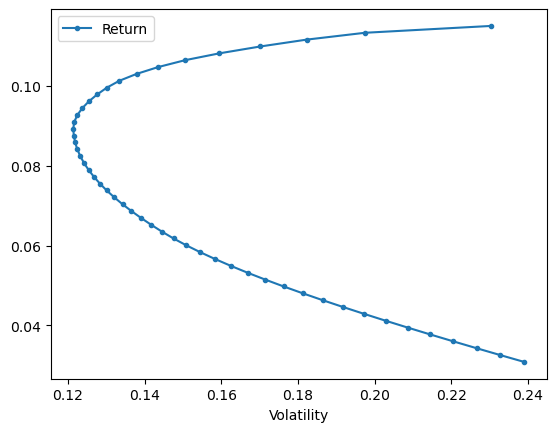

In [125]:
# efweights = efficient frontier weight. This is a list that gives us all the points associated with the portfolios 
# of these 4 assets defined above on the ef. Look at the 50 portfolios on the ef line
efweights = optimal_weights(50, eret[l], cov.loc[l,l])

# Calculate the portfolio return and vol 
pret = [portfolio_ret(w, eret[l]) for w in efweights]
pvol= [portfolio_vol(w, cov.loc[l,l]) for w in efweights]

# Put the above returns and volatilities in a data frame then visuslize then 
ef = pd.DataFrame({"Return": pret, 
                   "Volatility": pvol})
ef
ef.plot.line(x="Volatility", y="Return", style=".-")

### Part A.	Global Minimum Variance Portfolio: (25%) 
1.	a)  Modify the optimization function that we developed in class (“minimize_vol()”) so that it generates the weights for the Global Minimum Variance portfolio and name it gmv(). 
2.	b)  Use the function that you developed on the set of your favorite ten industries and characterize the Global Minimum Variance portfolio—that is, find the asset weights, expected return, and volatility for this portfolio. 

In [126]:
def gmv(target_return, ereturns, covmat):
    """
    target return --> weights in a minimum-variance portfolio that generates target return
    """
    n=ereturns.shape[0]
    init_values=np.repeat(1/n, n)
    
    bounds=((0,1),)*n 
    
    #Constraints:
    weights_sum_to_1={'type':'eq',
                     'fun': lambda weights: np.sum(weights)-1}
    
    return_is_target={'type':'eq',
                     'args':(ereturns,),
                     'fun': lambda weights, ereturns: portfolio_ret(weights, ereturns)-target_return}
    
    results=minimize(portfolio_vol,
                    init_values,
                    args=(covmat,),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=(weights_sum_to_1, return_is_target),
                    options={'disp':False})
    
    weights=results.x
    return weights

In [127]:
## Asset weights og the global minimum variance portfolio
w11=gmv(0.11, eret[l], cov.loc[l,l])
w11

array([7.29607637e-02, 0.00000000e+00, 4.71849658e-01, 6.79704549e-02,
       1.85828430e-01, 5.55382563e-17, 2.01390693e-01, 0.00000000e+00,
       3.03576608e-17, 0.00000000e+00])

In [128]:
## Porfolio return 
portfolio_ret(w11,eret[l])

0.11000000000058519

In [129]:
## Porfolio variance 
portfolio_vol(w11, cov.loc[l,l])

0.170701287293143

### Part B.	Maximum Sharpe Ratio Portfolio: (45%) 
1.	a)  Modify the optimization function that we developed in class (“minimize_vol()”) so that it generates the weights for the Maximum Sharpe Ratio portfolio and name it msr().        Hint: maximizing f(x) is the same as minimizing -f(x). 

2.	b)  Use the function that you developed on the set of your favorite ten industries and characterize the Maximum Sharpe Ratio portfolio—that is, find the asset weights, expected return, and volatility for this portfolio. 


In [111]:
def msr(returns):
    """
    Computes the weights of the Maximum Sharpe Ratio portfolio.

    Parameters:
    returns (pd.DataFrame): A pandas dataframe of asset returns.

    Returns:
    weights (np.array): An array of floats representing the weights of each asset in the portfolio.
    """
    n = returns.shape[1]
    initial_weights = np.array([1/n]*n)

    # Define the objective function to be minimized
    def negative_sharpe_ratio(weights, returns):
        port_return = np.dot(returns.mean(), weights)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
        return -port_return/port_volatility

    # Define the weight constraints
    bounds = ((0,1),)*n
    weight_constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    # Use scipy.optimize.minimize to minimize the objective function
    result = minimize(negative_sharpe_ratio, 
                      initial_weights, 
                      args=returns, 
                      method='SLSQP', 
                      bounds=bounds, 
                      constraints=weight_constraint)

    return result.x

In [130]:
## Weights for the Maximum Sharpe Ratio portfolio
w11=msr(ret[l])
w11

array([1.21908365e-02, 3.54922438e-01, 5.41000551e-11, 1.51114096e-01,
       3.90206809e-01, 3.98781159e-10, 3.23071392e-10, 1.38303233e-10,
       1.55209318e-10, 9.15658190e-02])

In [133]:
## Porfolio return 
portfolio_ret(w11,eret[l])

0.09363485780253815

In [132]:
## Porfolio variance
portfolio_vol(w11, cov.loc[l,l])

0.14700292802768974